In [1]:
%reset -f

import timeit
from operator import attrgetter
import time
import matplotlib.pyplot
import pylab
import matplotlib.pyplot as plt
from collections import Counter
from collections import Counter
import matplotlib.pyplot as plt
import logging.handlers
import sys
import configparser
import logging.handlers
import unittest
import json, hmac, hashlib, time, requests, base64
from requests.auth import AuthBase
import pandas as pd
import random
import numpy as np
from pandas.io.json import json_normalize
from multiprocessing.dummy import Pool as ThreadPool
import threading
import time
from statistics import mean 
import statistics as st
import os
import numpy as np    
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import preprocessing
from datetime import datetime
import datetime
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import numpy as np
import pandas as pd
import numpy as np
from functools import reduce
import pandas as pd
import numpy as np
import pandas as pd
from ast import literal_eval
import unittest
import math

In [2]:
class ArgMaxValueDto:

    arg_max = None
    arg_max_value = None
    state_with_arg_max = None
    
    def __init__(self, arg_max, arg_max_value, state_with_arg_max): 
        self.arg_max = arg_max
        self.arg_max_value = arg_max_value
#         state_with_arg_max - also the next state
        self.state_with_arg_max = state_with_arg_max
    
class QTable:

    q_table_df_xo = None
    
    def setup_q_table(self):

        boards = []
        temp_boards = []

        for i in range(0 , 19683) : 
            c = i
            temp_boards = []
            for ii in range(0 , 9) : 
                temp_boards.append(c % 3)
                c = c // 3
            boards.append(temp_boards)

        pd.set_option("display.precision", 8)
        q_table_df_xo = pd.DataFrame({'state_list': boards})
        q_table_df_xo['state_string'] = [''.join(map(str, s)) for s in q_table_df_xo['state_list']]
        q_table_df_xo['state_string'] = [''.join(map(str, s)) for s in q_table_df_xo['state_list']]

        q_table_df_xo['a_value_0'] = 0
        q_table_df_xo['a_value_1'] = 0
        q_table_df_xo['a_value_2'] = 0
        q_table_df_xo['a_value_3'] = 0
        q_table_df_xo['a_value_4'] = 0
        q_table_df_xo['a_value_5'] = 0
        q_table_df_xo['a_value_6'] = 0
        q_table_df_xo['a_value_7'] = 0
        q_table_df_xo['a_value_8'] = 0

        q_table_df_xo[["a_value_0", "a_value_1", "a_value_2", "a_value_3", "a_value_4", "a_value_5", "a_value_6", "a_value_7", "a_value_8"]] = q_table_df_xo[["a_value_0", "a_value_1", "a_value_2", "a_value_3", "a_value_4", "a_value_5", "a_value_6", "a_value_7", "a_value_8"]].astype(np.float64)

        self.q_table_df_xo = q_table_df_xo
        
        return self.q_table_df_xo

    def get_q_table(self):
        return self.q_table_df_xo()

In [3]:
q = QTable().setup_q_table()
q[:3]

,state_list,state_string,a_value_0,a_value_1,a_value_2,a_value_3,a_value_4,a_value_5,a_value_6,a_value_7,a_value_8
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0]",000000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[1, 0, 0, 0, 0, 0, 0, 0, 0]",100000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[2, 0, 0, 0, 0, 0, 0, 0, 0]",200000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Colab: https://colab.research.google.com/drive/1rpP7Du4up36DIcELXohoUi_Q_xKbDUeA?usp=sharing
# gist: https://gist.github.com/aronayne/c014fc1140d0ca43ed4fcd17bd3d522e

def epsilon_greedy_2(epsilon, state_string, q_table_df_xo, player_name, train=False):

    a = ArgMax(q_table_df_xo)

    """
    @param Q Q values state x action -> value
    @param epsilon for exploration
    @param s number of states
    @param train if true then no random actions selected
    """
    if train or np.random.rand() < epsilon:
        valid_index = []
        i = 0
        for a in state_string : 
            if a == '2' and a != '0' and a != '1':
                valid_index.append(i)
        i = i + 1
        return (random.choice(valid_index) , 'le')
    else:
        return (int(a.get_arg_max_value(state_string, player_name).arg_max) , 'ge')

class ArgMax:

    def __init__(self, q_table): 
        self.q_table = q_table 
        
    def values_to_find_arg_max_for(self, state_string):

        l = list(state_string)

        i = 0
        pos = []
        for n in l:
            if n == '2':
                pos.append('a_value_'+str(i))
            i = i + 1

        return pos
 
    def get_available_states_for_state(self, state_string_test, player_turn):
        valid_index = []
        i = 0
        
        for a in state_string_test :   
            if a == '2' and a != '0' and a != '1' :
                valid_index.append(i)
            i = i + 1
        
        states_gen = []
        for v in valid_index : 
            l = list(state_string_test)
            l[v] = player_turn
            states_gen.append("".join(l))

        return states_gen

    def get_arg_max_value(self, state_string , player):
        
        states_arg_max_values = []
        states_gen = self.get_available_states_for_state(state_string , player)
        
        for state in states_gen : 
            if len(self.q_table[self.q_table['state_string'] == state]) > 0 :
                state_value_arg = self.q_table[self.q_table['state_string'] == state][self.values_to_find_arg_max_for(state_string)].idxmax(axis=1).values[0].replace('a_value_' , '')
                states_arg_max_values.append(ArgMaxValueDto(state_value_arg, float(self.q_table[self.q_table['state_string'] == state][self.values_to_find_arg_max_for(state_string)]['a_value_'+state_value_arg]) , state))
        
#         print(states_arg_max_values , states_gen , state_string , player)
        return max(states_arg_max_values, key=attrgetter('arg_max_value'))





In [5]:
# q_table = df = pd.DataFrame({ 'state_string' : ['1', '2'] , 'a_value_0': ['1' , '1'], 'a_value_1': [1.0 , 2.0], 'a_value_2': [10.0 , 2.0], 'a_value_3': [1.0 , 2.0], 'a_value_4': [1.0 , 2.0], 'a_value_5': [1.0 , 2.0], 'a_value_6': [1.0 , 2.0], 'a_value_7': [1.0 , 2.0], 'a_value_8': [1.0 , 2.0]})

# df

In [6]:
q_table = pd.DataFrame({ 'state_string' : ['222222222', '222222222' , '122222222'] , 'a_value_0': ['1' , '1', '1'], 'a_value_1': ['10' , '1', '1'], 
                        'a_value_2': ['10' , '1', '1'], 'a_value_3': ['1' , '1', '1'], 'a_value_4': ['1' , '1', '1'], 'a_value_5': ['1' , '1', '1'], 
                        'a_value_6': ['1' , '1' , '1'], 'a_value_7': ['1' , '1', '1'], 'a_value_8': ['1' , '1', '1']})

print(q_table)

,state_string,a_value_0,a_value_1,a_value_2,a_value_3,a_value_4,a_value_5,a_value_6,a_value_7,a_value_8
0,222222222,1,10,10,1,1,1,1,1,1
1,222222222,1,1,1,1,1,1,1,1,1
2,122222222,1,1,1,1,1,1,1,1,1


In [20]:
results = []

for i in range(1 , 100):
    if i % 10 == 0 : 
        print(i)
    e_greedy = epsilon_greedy_2(.1 , '222222222' , q , '1')
    if e_greedy[1] == 'ge':
        results.append((e_greedy[0] , 'Explore'))
    if e_greedy[1] == 'le':
        results.append((e_greedy[0] , 'Exploit'))
#     results.append(e_greedy)

10
20
30
40
50
60
70
80
90


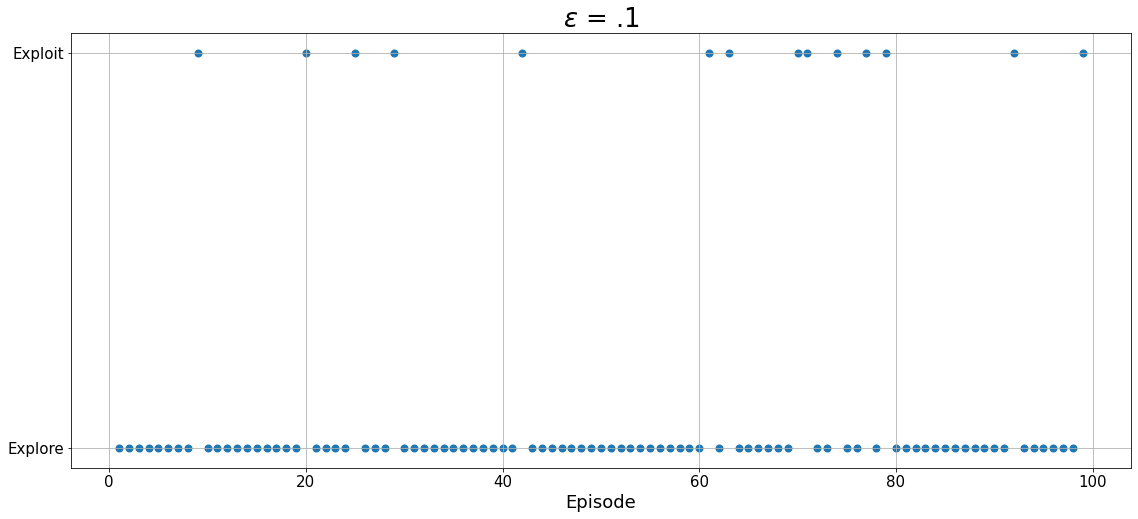

In [21]:
# n = 10

# average_values = df_episode_details.rolling(n)['EpisodeReward'].mean()[n-1::n].values

plt.figure(figsize=(19,8))

# X-axis label.
plt.xlabel('Episode', fontsize = 18)

# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

# Y-axis label.
# plt.ylabel('$\epsilon$', fontsize = 18)

# Title of the plot.
plt.title('$\epsilon$ = .1', fontsize = 26)

# X-axis: YEAR_BUILT
x=[i for i in range(1 , len(results)+1)]

# Y-axis: Number of properties built.
y= [r[1] for r in results]

# Grid
plt.grid(True)

# Legend for the plot.
# plt.legend()

plt.scatter(x, y, linewidth=2);



In [22]:
results = []

for i in range(1 , 100):
    if i % 10 == 0 : 
        print(i)
    e_greedy = epsilon_greedy_2(.9 , '222222222' , q , '1')
    if e_greedy[1] == 'ge':
        results.append((e_greedy[0] , 'Explore'))
    if e_greedy[1] == 'le':
        results.append((e_greedy[0] , 'Exploit'))
#     results.append(e_greedy)

10
20
30
40
50
60
70
80
90


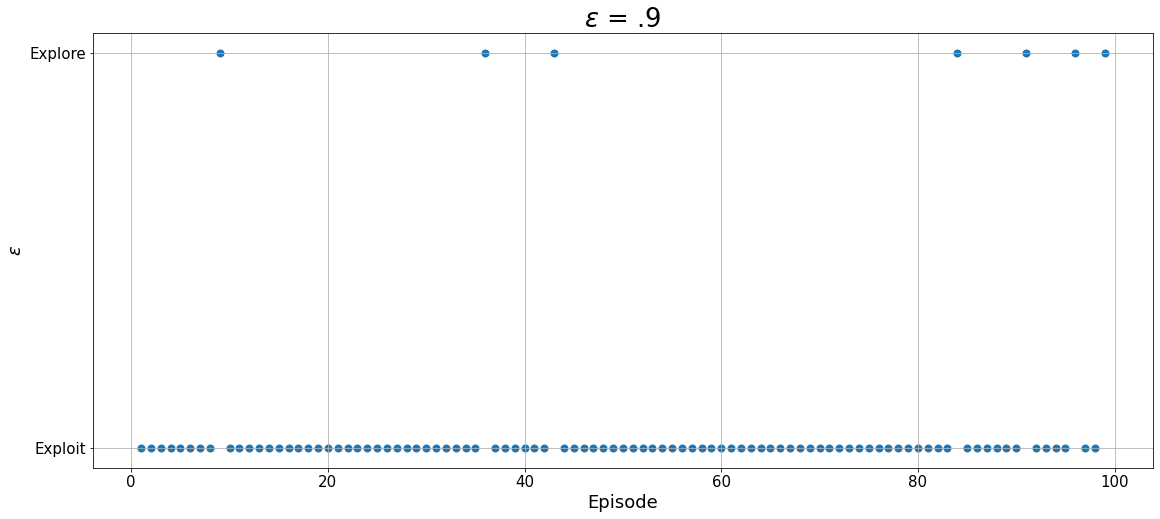

In [23]:

plt.figure(figsize=(19,8))

# X-axis label.
plt.xlabel('Episode', fontsize = 18)

# We change the fontsize of minor ticks label 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.tick_params(axis='both', which='minor', labelsize=15)

# Y-axis label.
plt.ylabel('$\epsilon$', fontsize = 18)

# Title of the plot.
plt.title('$\epsilon$ = .9', fontsize = 26)

# X-axis: YEAR_BUILT
x=[i for i in range(1 , len(results)+1)]

# Y-axis: Number of properties built.
y= [r[1] for r in results]

# Grid
plt.grid(True)

# Legend for the plot.
# plt.legend()

plt.scatter(x, y, linewidth=2);

